#### Why this analysis?

`Some recently watched short documentaries/interviews on human trafficking rackets in India blew my mind off 🤯. So, I felt like checking out what the national records have to say about this issue.  
I have compiled this dataset from the National Crime Records Bureau, India and also performed an analysis on the same.  
Here is my report.`

I have mentioned short description about few terms present in the dataset. For further reading, you may refer [this site](https://www.lawteacher.net/free-law-essays/administrative-law/concept-of-a-police-report-administrative-law-essay.php#:~:text=When%20the%20charge%20sheet%20is,Police%20after%20the%20investigation%20process.). 

1. **Charge Sheet-** is the complaint of a private individual on which criminal proceedings are initiated. When the charge sheet is sent by police to Magistrate, the preliminary stage of investigation and preparation is over.
2. **Final report-** The charge sheet is followed by the Final Report. It records the conclusion arrived at by the Police after the investigation process.  

***So, if Final Report column contains 0, it implies that the investigation is not yet complete.***
    
 


#### About the dataset:
The data contains number of cases of human trafficking recorded in 2018, 2019 and 2020, in India.  
Detailed description of the dataset can be found on the [dataset page](https://www.kaggle.com/datasets/cshefali/human-trafficking-in-india-2018-2020).

In [1]:
#Load all the relevant packages.
library(tidyverse) # metapackage of all tidyverse packages
library(janitor) #for data cleaning.
library(ggplot2) #for data viz
library(readxl) #this package is not part of core tidyverse, so explicitly loaded. The files are in .xlsx format.
library(RColorBrewer) #for enhanced Viz
library(treemapify) #for making treemaps with ggplot2 package.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
#Reading all the data files.
#2018
states_data_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_states_data.xlsx")
victims_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_victims_trafficked.xlsx")
rescued_victims_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_victims_rescued.xlsx")
victims_nationality_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_rescued_victims_nationality.xlsx")
culprit_disposal_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_culprits_disposal.xlsx")
cases_disposal_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_police_and_court_disposal_of_cases.xlsx")
purpose_18 <- read_excel("../input/human-trafficking-in-india-2018-2020/2018_human_trafficking_purpose.xlsx")

#2019
states_data_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_states_data.xlsx")
victims_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_victims_trafficked.xlsx")
rescued_victims_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_victims_rescued.xlsx")
victims_nationality_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_victims_rescued_nationality.xlsx")
culprit_disposal_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_culprits_disposal.xlsx")
cases_disposal_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_police_and_court_disposal.xlsx")
purpose_19 <- read_excel("../input/human-trafficking-in-india-2018-2020/2019_trafficking_purpose.xlsx")

#2020
states_data_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_states_data.xlsx")
victims_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_victims_trafficked.xlsx")
rescued_victims_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_victims_rescued.xlsx")
victims_nationality_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_rescued_victims_nationality.xlsx")
culprit_disposal_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_culprits_disposal.xlsx")
cases_disposal_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_case_disposal.xlsx")
purpose_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_trafficking_purpose.xlsx")
aht_units_20 <- read_excel("../input/human-trafficking-in-india-2018-2020/2020_number_of_AHT_Units.xlsx")

In [3]:
head(states_data_18)

S. No.,State/UT,Cases Reported,Percentage Share of State (2018),Mid-Year Projected Population (In Lakhs)+,Rate of Cognizable Crimes (IPC)++,region type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Andhra Pradesh,240,9.7,520.3,0.5,state
2,Arunachal Pradesh,3,0.1,14.9,0.2,state
3,Assam,262,10.6,340.4,0.8,state
4,Bihar,127,5.2,1183.3,0.1,state
5,Chhattisgarh,51,2.1,284.7,0.2,state
6,Goa,55,2.2,15.3,3.6,state


### I. Data Cleaning:
Following are the steps I took for cleaning this data.
##### 1. Cleaned column names.
##### 2. Checked for Missing values.
##### 3. Checked for Duplicate rows.
##### 4. Renamed column common in all files to one name, for uniformity.
##### 5. Removed symbols like '+', '\*' from cell values with numeric data.
##### 6. Inconsistent Data Type of Columns.
##### 6. Joining 2 dataframes into 1

#### I.1 Cleaning column names
The following code cleans all the dataframes simultaneously. Some of the components are explained as follows:
1. **c()**- combine function combines all the dataframe names into a vector.
2. Inside the loop:
    * **i**- contains name of 1st df in 1st iteration, 2nd df in 2nd iteration & so on...
    * **assign()**- used to assign the 2nd parameter to 1st parameter.
        * Syntax- assign(variable, value)
        *  Here, first clean_names() is applied to the df & the result is stored in i.
    * **clean_names()**- this function cleans all the column headers in a file, removing:
        * white spaces, brackets and other symbols.
        * converts everything to lowercase.
        * formats the name of column in snake case, e.g. name_of_person.
    * **get(i)**- 
        * takes in the name of one dataframe stored in i.
        * returns the value present in this dataframe.
        * clean_names(get(i))- the column headers of this df get cleaned by clean_names().

In [4]:
#cleaning the column headers of all files simultaneously.
#All spaces, symbols, brackets, upper case is removed 
#and column headers are formatted to snake case.
dataframe_names <- c("states_data_18","victims_18","rescued_victims_18","victims_nationality_18",
                    "culprit_disposal_18","cases_disposal_18","purpose_18","states_data_19","victims_19","rescued_victims_19","victims_nationality_19",
                    "culprit_disposal_19","cases_disposal_19","purpose_19","states_data_20","victims_20","rescued_victims_20","victims_nationality_20",
                    "culprit_disposal_20","cases_disposal_20","purpose_20","aht_units_20")
for (i in dataframe_names)
    {assign(i,janitor::clean_names(get(i)))
    }

In [5]:
#a quick look at cleaned column headers
head(states_data_18,3)

s_no,state_ut,cases_reported,percentage_share_of_state_2018,mid_year_projected_population_in_lakhs,rate_of_cognizable_crimes_ipc,region_type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Andhra Pradesh,240,9.7,520.3,0.5,state
2,Arunachal Pradesh,3,0.1,14.9,0.2,state
3,Assam,262,10.6,340.4,0.8,state


#### I.2 Missing Values & Duplicate Rows

Following code creates a dataframe with 3 columns:  
* **column 1- name of sheet**
* **column 2- number of missing values in each sheet**
* **column 3- number of duplicate rows in each sheet**  
I tried analysing NA values and duplicate rows in this manner because individual analysis of 22 files would have been time-consuming.  
And this table highlights the sheets containing such values.

I wanted to see how many missing values & duplicated rows are present in each of the 22 files. So, instead of chekcing them one by one, I did the following:
1. Created an empty dataframe with 3 columns- sheet name, total_na_values, total_duplicated_rows.
    1. sheet_name- this column contains names of all 22 files.
    2. total_na_values- contains total number of missing values in each file.
    3. total_duplicated_rows- contains total number of duplicate rows found in each file.
2. Ran a loop over **`dataframes_names`** which contains names of all sheets.
    1. each iteration works on one file and adds a row to the df_summary dataframe.
    2. **rbind()**- appends rows to a dataframe.
3. **NOTE:**
    1. `colnames(df_summary) <- columns` sets the name of the columns to the ones specified in `columns`. 
    2. ***Why have I written it at the end of this code snippet and not while creating the empty dataframe?***  
        That's because when an empty dataframe is passed to rbind function (in the 1st iteration), rbind overides the empty df and stores the results which changes the column names. So, when I was creating this df, the column names were constantly updating to something else. Hence, i wrote this line of code at the end in order to get the column headers as you are able to see now.
    

In [6]:
columns <- c("sheet_name","total_na_values","total_duplicate_values")
df_summary <- data.frame(matrix(nrow=0,ncol=length(columns)))#creating an empty dataframe.
for (i in dataframe_names){
    new_row <- c(i,sum(is.na(get(i))),sum(duplicated(get(i))))
    df_summary <- df_summary %>% rbind(new_row)
}
colnames(df_summary) <- columns

In [7]:
df_summary

sheet_name,total_na_values,total_duplicate_values
<chr>,<chr>,<chr>
states_data_18,0,0
victims_18,0,0
rescued_victims_18,0,0
victims_nationality_18,0,0
culprit_disposal_18,0,0
cases_disposal_18,13,0
purpose_18,0,0
states_data_19,0,0
victims_19,0,0


From the summary table, it is clear that missing values are present in 4 files:
1. cases_disposal_18
2. cases_disposal_19
3. cases_disposal_20  
4. states_data_20  
And no duplicate rows were found in any of the files.


##### Observations about the Missing Values:
1. **case_disposal files-** Data is missing in columns **`chargesheeted_rate`**, **`cases_conviction_rate`**.  
    * **chargesheeted rate=** (cases_chargesheeted/(cases_chargesheeted + final report))* 100.  This column depends on chargesheeted columns. So, if no. of cases chargesheeted is 0, the chargesheet rate becomes NA.
    If the rate is NA, it means that:  
        * either no trafficking cases were reported OR
        * no chargesheet was filed for reported cases.
    * **case conviction rate=** (cases convicted by court/cases with complete trials)* 100. If cases with complete trials is 0 or cases convicted is 0, this value is NA.  
    
2. **states_data_20 file**-  
    * The column **`chargesheeting rate`** contains most of the NA values. I won't be using this column & it is not present in the **states_data** file of 2018, 2019.
    * NA values are also present in the Ladhak row. 
        * That's because the earlier state of Jammu and Kashmir was converted to 2 Union Territories: **Jammu & Kashmir** & **Ladhak**. 
        * So, in this file as per desciption on website data, the combined data of Jammu & Kashmir and Ladhak are present in the Jammu & Kashmir row.  
        Hence, these NA values can be ignored.

##### Removing some columns
The following code removes: 
* **`s_no`** column from **states_data_18** file. 
* **`chargesheeting_rate`** column from **states_data_20** file.  

These columns are not required in this analysis and no other files for other years have these columns.

In [8]:
#removing the s_no column & chargesheeting_rate from states_data_18 to bring uniformity. 
#None of the other files have this col.
states_data_18 <- states_data_18 %>% select(-s_no)
#removing chargesheeting_rate column from states_data_20 file.
states_data_20 <- states_data_20 %>% select(-chargesheeting_rate)

#### I.3 Renaming columns common to all file, for uniformity.
In some files, 1st column is **`states`** and other files have 1st column as **`states_ut`**.  
This column gives the names of all states and union territories in India.  
Hence, the following code renames this column of all the files as **`states_ut`** to bring uniformity.

In [9]:
#renaming the column names of all 22 files to bring uniformity
for (i in dataframe_names) {
    assign(i,rename(get(i),states_ut=colnames(get(i))[1]))
}

#### 3. Inconsistent Data Type of Columns

I checked the data type of columns in each file using **str()** and **glimpse()**.  
And the following issues were observed:  
1. **states_data_20**- 2 columns,`total_cases_2018`, `total_cases_2019` are character type instead of numeric.
2. **victims_nationality_18**- `male`,`female`,`total_rescued` are character type instead of numeric.

In [10]:
str(states_data_20)
str(victims_nationality_18)

tibble [36 × 7] (S3: tbl_df/tbl/data.frame)
 $ states_ut                             : chr [1:36] "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ total_cases_2018                      : chr [1:36] "240" "3" "308" "127" ...
 $ total_cases_2019                      : chr [1:36] "245" "0" "201" "106" ...
 $ total_cases_2020                      : num [1:36] 171 2 124 75 38 17 13 14 4 140 ...
 $ mid_year_projected_population_in_lakhs: num [1:36] 526 15.2 347.9 1219 292.4 ...
 $ rate_of_cognizable_crimes_ipc         : num [1:36] 0.3251 0.1314 0.3564 0.0615 0.13 ...
 $ region_type                           : chr [1:36] "state" "state" "state" "state" ...
tibble [144 × 6] (S3: tbl_df/tbl/data.frame)
 $ states_ut            : chr [1:144] "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ male                 : chr [1:144] "1" "4" "29" "466" ...
 $ female               : chr [1:144] "452" "0" "237" "80" ...
 $ total_victims_rescued: chr [1:144] "453" "4" "266" "546" ...
 $ 

Few other observations in the data:
1. In some dataframes, the **`state_ut`** column contains '@', '+','\*' and other such symbols alongside the names of states and Union Territories. These symbols have to be omitted. e.g. **"Bihar\@"**
2. Some columns with numeric data contain symbols like '+','\*','++' etc. These symbols need to be omitted. e.g. **"24\+"**, **"7\*"**
3. **An Important Observation:**
    * In the dataframe `states_data_20`, 2 columns`total_cases_2018`, `total_cases_2019` are character type instead of numeric. 
    * And some values in these columns have a '+' sign, for e.g. total_cases_2019 for one state is "54+".
    * So, before converting these cols from character to numeric type, these symbols need to be removed. Otherwise the `as.numeric()` function will convert these cell values to NA. 
    * ***Hence, I have first removed all such symbols in the files and then converted the data type of inconsistent columns to numeric***.

In [11]:
#removing symbols from states_data_20 dataframe
states_data_20 <- states_data_20 %>%
                    mutate(states_ut = gsub("@","",states_ut),
                          total_cases_2018 = gsub("\\+","",total_cases_2018),
                          total_cases_2019 = gsub("\\+","",total_cases_2019))



In [12]:
#changing the data type of inconsistent columns from character to numeric
states_data_20 <- states_data_20 %>%
                    mutate(total_cases_2018 = as.numeric(total_cases_2018),
                           total_cases_2019 = as.numeric(total_cases_2019))


In [13]:
victims_nationality_18 <- victims_nationality_18 %>%
                    mutate(male = as.numeric(male),
                          female = as.numeric(female),
                          total_victims_rescued = as.numeric(total_victims_rescued))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


#### II. Analysis

In [14]:
head(states_data_18)

states_ut,cases_reported,percentage_share_of_state_2018,mid_year_projected_population_in_lakhs,rate_of_cognizable_crimes_ipc,region_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Andhra Pradesh,240,9.7,520.3,0.5,state
Arunachal Pradesh,3,0.1,14.9,0.2,state
Assam,262,10.6,340.4,0.8,state
Bihar,127,5.2,1183.3,0.1,state
Chhattisgarh,51,2.1,284.7,0.2,state
Goa,55,2.2,15.3,3.6,state


##### Setting the Plot Size in Kaggle:
* The plot size in Kaggle messes up sometimes, especially while displaying multiple plots in 1 frame. (e.g. when using **`~facet_wrap()`** in R).  
* So, the following function takes 2 arguments as plot height and plot width and sets the plot size as per user's requirements.  
* It will be called before every visualization.

In [15]:
kaggle_plotsize <- function(width, height) {
                    options(repr.plot.width = width, repr.plot.height = height)
                    }

#### Q1. What was the total number of trafficking cases reported in each Indian state in 2018?

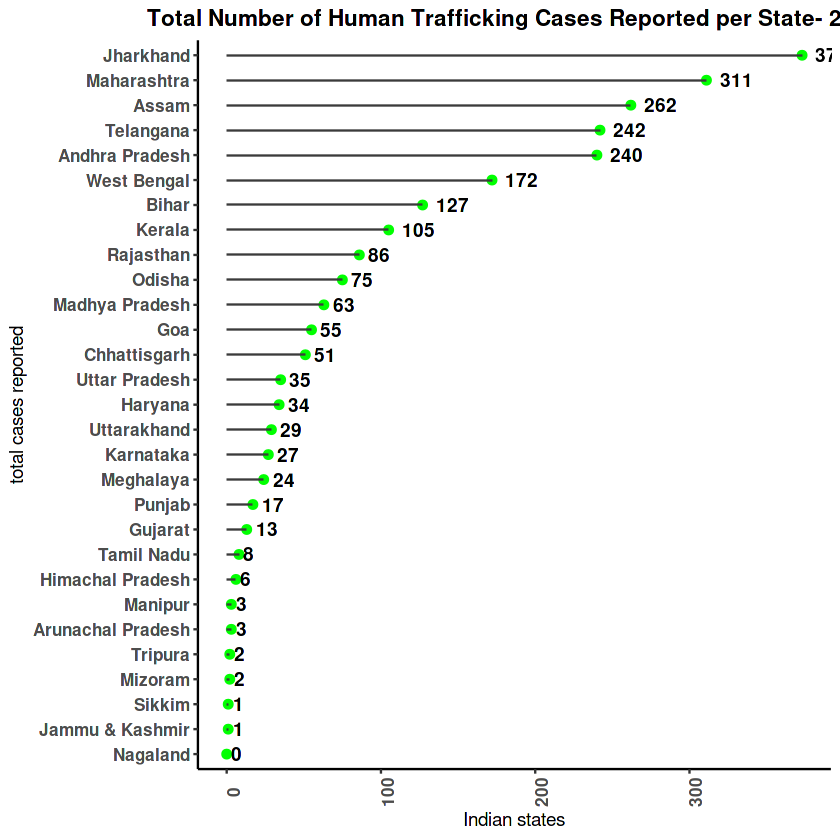

In [16]:
states_data_18 %>%
filter(region_type=="state") %>%
ggplot(aes(x=reorder(states_ut,cases_reported),y=cases_reported)) +
geom_point(size=2,color="green") +
geom_segment(aes(x=states_ut,xend=states_ut,y=0,yend=cases_reported),color="grey23") +
geom_text(aes(label=cases_reported),color="black",stat="identity",hjust=-0.4,fontface="bold") +
theme_classic() +
labs(x="total cases reported", y="Indian states",
     title="Total Number of Human Trafficking Cases Reported per State- 2018") +
theme(axis.text = element_text(face="bold",size=10),legend.position="none",
     plot.title=element_text(face="bold",hjust=0.5),axis.text.x=element_text(angle=90)) +
coord_flip()

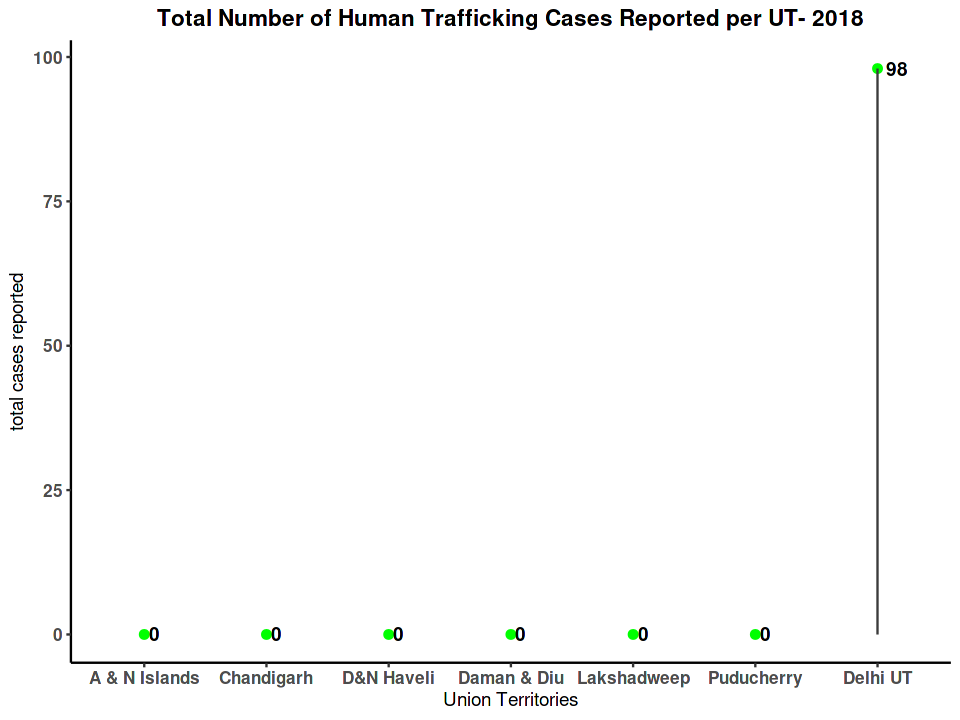

In [17]:
#total cases reported per Union Territory in 2018
kaggle_plotsize(8,6)
states_data_18 %>% 
filter(region_type=="union territory") %>%
ggplot(aes(x=reorder(states_ut,cases_reported),y=cases_reported,fill=states_ut)) +
geom_point(size=2,color="green") +
geom_segment(aes(x=states_ut,xend=states_ut,y=0,yend=cases_reported),color="grey23") +
geom_text(aes(label=cases_reported),color="black",stat="identity",hjust=-0.4,fontface="bold") +
theme_classic() +
theme(axis.text = element_text(face="bold",size=10),legend.position="none",
     plot.title=element_text(face="bold",hjust=0.5)) +
labs(x="Union Territories", y="total cases reported",
     title="Total Number of Human Trafficking Cases Reported per UT- 2018")

#### Q2. What was the % share of each state/UT in the crime numbers in 2018?

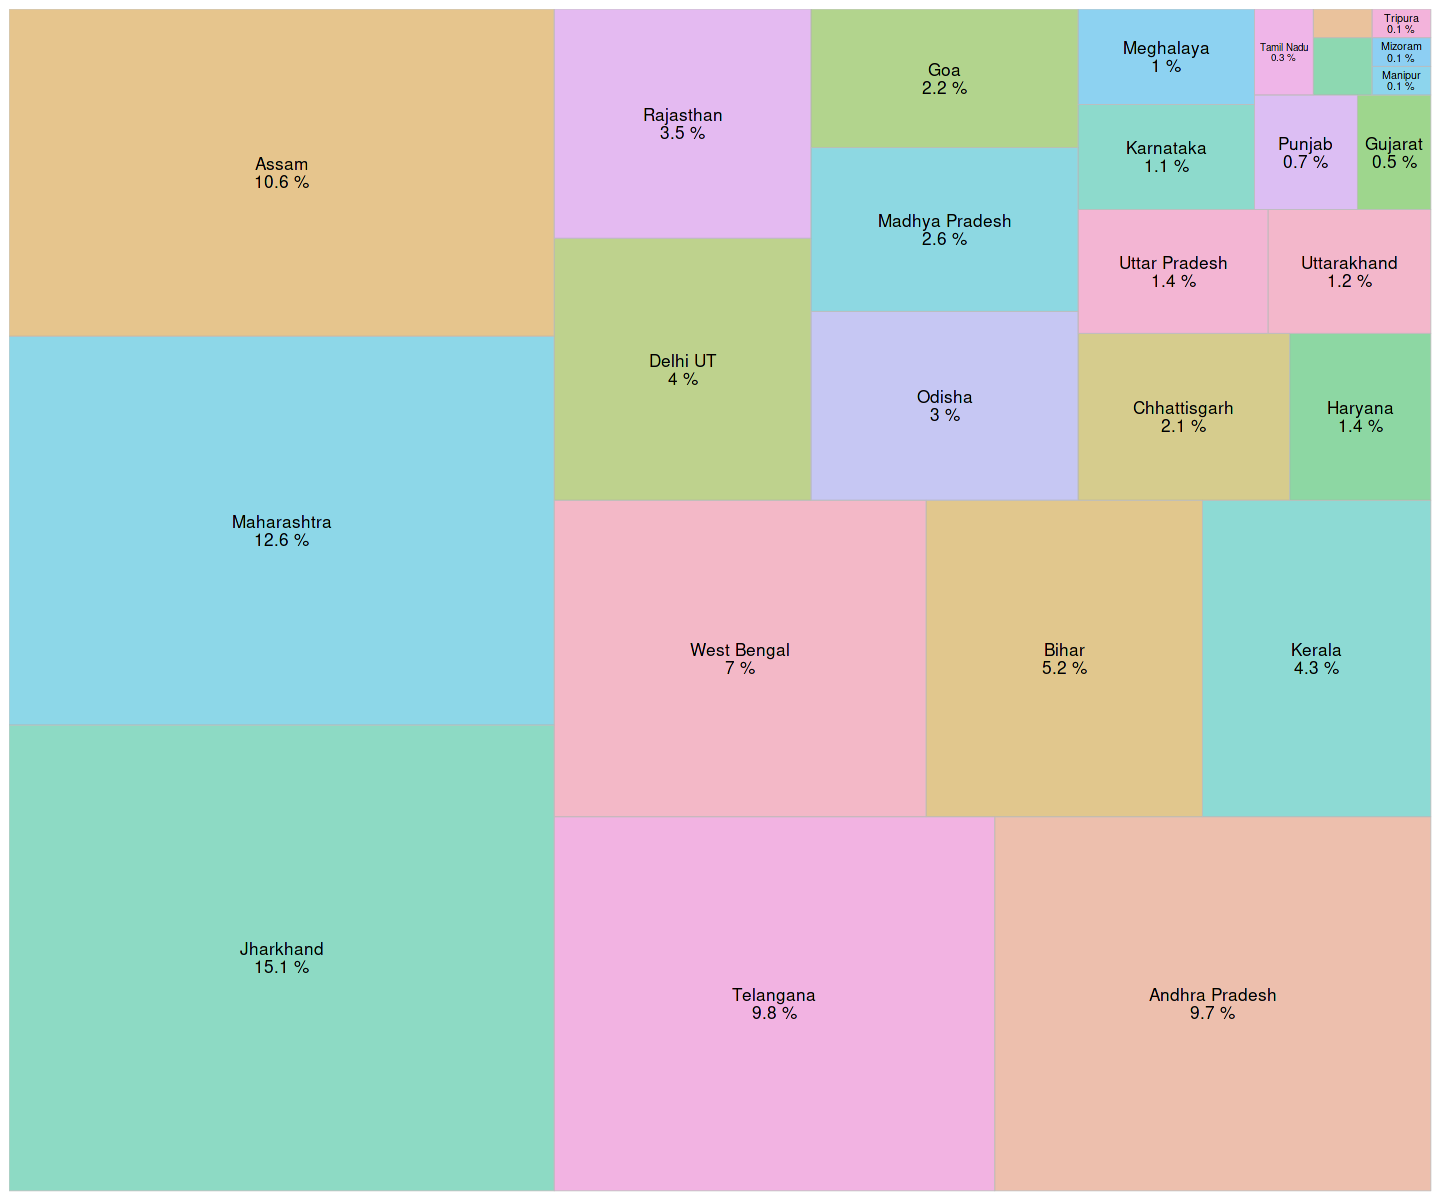

In [18]:
#percentage share of each state in the total reported cases annually
#representing through a Treemap.
kaggle_plotsize(12,10)
states_data_18 %>%
ggplot(aes(area=percentage_share_of_state_2018,fill=states_ut,
           label=paste(states_ut,paste(percentage_share_of_state_2018,"%"),sep='\n'))) +
geom_treemap(alpha=0.4) +
geom_treemap_text(color="black",place="center",size=10) +
theme(legend.position="none")

